In [531]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [532]:
titanic = pd.read_csv('data/titanic_clean.csv')

In [533]:
titanic.head()

,Passengerid,Pclass,Survived,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,female,29.0000,0,0,24160,211.3375,B5,S
1,2,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S
2,3,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S
3,4,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S
4,5,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S


## Exploratory Data Analysis

In [534]:
titanic.isna().sum()

Passengerid       0
Pclass            0
Survived          0
Sex               0
Age             263
Sibsp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [535]:
titanic.corr()

,Passengerid,Pclass,Survived,Age,Sibsp,Parch,Fare
Passengerid,1.000000,0.897822,-0.293717,-0.343888,0.065594,0.003584,-0.481215
Pclass,0.897822,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629
Survived,-0.293717,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265
Age,-0.343888,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739
Sibsp,0.065594,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238
Parch,0.003584,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539
Fare,-0.481215,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000


In [536]:
titanic.describe()

,Passengerid,Pclass,Survived,Age,Sibsp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,378.020061,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,328.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [537]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Survived     1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   Sibsp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


In [538]:
#upper_outlier = train_df.Fare.quantile(0.95)
#train_data = train_df[train_df.Fare < upper_outlier].copy()

## Handling missing values for age and fare

In [539]:
titanic.Age.fillna(titanic.groupby(['Pclass']).Age.transform('mean'), inplace = True)

In [540]:
sum(titanic.Age.isna())

0

In [541]:
titanic.Fare.fillna(titanic.groupby(['Pclass']).Fare.transform('mean'), inplace = True)

In [542]:
sum(titanic.Fare.isna())

0

## Handling missing values in Cabin-column by dropping the whole column

In [543]:
titanic.drop(columns=['Cabin'], inplace = True)

## Feature engineering

# Implementing logistic regression from scratch

In [544]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [545]:
def calculate_loss(Y, y_hat):
    """Calculates the binary cross entropy loss"""
    m = len(Y)
    loss = (-1/m)*np.sum((Y*np.log(y_hat)) + (1-Y)*np.log(1-y_hat))
    return loss

In [546]:
def gradient_descent(X, Y, num_iterations=50000, learning_rate=0.001, plot_cost=True):
    X = np.vstack([np.ones(X.shape[0]), X.T])
    theta = np.zeros(X.shape[0]).reshape(-1, 1) # initializing weights and bias
    m = len(Y)
    costs = []
    
    y_hat = sigmoid(np.dot(X.T, theta))
    cost = calculate_loss(Y, y_hat)
    
    for i in range(num_iterations):
        theta = theta - learning_rate*((1/m)*np.dot(X, (y_hat-Y)))
        y_hat = sigmoid(np.dot(X.T, theta))
        cost = calculate_loss(Y, y_hat)
        
        if plot_cost and i % 1000 == 0:
            print(f'The cost at iteration {i} is {cost}')
        if plot_cost and i % 10 == 0:
            costs.append(cost)
        
    if plot_cost:
        plt.plot(costs)
        plt.xlabel('Number of iterations (per tenth)')
        plt.ylabel('Cost')
        plt.title('Learning rate = ' + str(learning_rate))
    
    return y_hat, theta, cost

In [547]:
def predict(X, model, decision_boundary=0.5):
    X = np.vstack([np.ones(X.shape[0]), X.T])
    y_hat = sigmoid(np.dot(X.T, model))
    return np.where(y_hat > decision_boundary, 1, 0)

In [548]:
def score():
    pass

## Splitting dataset into train- and test-sets.

In [549]:
titanic.shape

(1309, 10)

In [550]:
def shuffle_and_split_data(X, y, train_size):
    X_train = X.sample(frac=train_size, random_state = 42)
    X_test = X.loc[~X.index.isin(X_train.index)].copy()
    X_test = X_test.sample(frac=1, random_state = 42)
    
    y_train = y.sample(frac=train_size, random_state = 42)
    y_test = y.loc[~y.index.isin(y_train)].copy()
    y_test = y_test.sample(frac=1, random_state = 42)
    
    return (X_train, X_test, y_train, y_test)

# Training the model

In [551]:
y = titanic['Survived'].values.reshape(-1,1)
dummies = pd.get_dummies(titanic[['Pclass', 'Sex', 'Embarked']], drop_first=True)
X = pd.concat([dummies, titanic[['Age', 'Fare', 'Sibsp', 'Parch']]], axis=1).values

In [552]:
from sklearn.model_selection import train_test_split

In [553]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [554]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((916, 8), (393, 8), (916, 1), (393, 1))

The cost at iteration 0 is 0.6606250986251201
The cost at iteration 1000 is 0.5817008249752409
The cost at iteration 2000 is 0.5648435091325703
The cost at iteration 3000 is 0.552994707159948
The cost at iteration 4000 is 0.5434793276456149
The cost at iteration 5000 is 0.5356167689004834
The cost at iteration 6000 is 0.5290417455016381
The cost at iteration 7000 is 0.5234981044549833
The cost at iteration 8000 is 0.5187924194936945
The cost at iteration 9000 is 0.5147739626570523
The cost at iteration 10000 is 0.5113230206030456
The cost at iteration 11000 is 0.5083432763816896
The cost at iteration 12000 is 0.5057565235750646
The cost at iteration 13000 is 0.503498828964322
The cost at iteration 14000 is 0.5015176512163165
The cost at iteration 15000 is 0.4997696239960149
The cost at iteration 16000 is 0.4982188205555483
The cost at iteration 17000 is 0.4968353784887659
The cost at iteration 18000 is 0.4955944002080026
The cost at iteration 19000 is 0.49447506800547386
The cost at it

The cost at iteration 162000 is 0.4653262113923087
The cost at iteration 163000 is 0.46527758068631897
The cost at iteration 164000 is 0.4652296568667517
The cost at iteration 165000 is 0.4651824293051035
The cost at iteration 166000 is 0.4651358875387496
The cost at iteration 167000 is 0.4650900212682637
The cost at iteration 168000 is 0.4650448203547834
The cost at iteration 169000 is 0.4650002748174174
The cost at iteration 170000 is 0.46495637483069674
The cost at iteration 171000 is 0.4649131107220681
The cost at iteration 172000 is 0.4648704729694266
The cost at iteration 173000 is 0.46482845219869207
The cost at iteration 174000 is 0.46478703918142333
The cost at iteration 175000 is 0.4647462248324722
The cost at iteration 176000 is 0.4647060002076766
The cost at iteration 177000 is 0.46466635650159205
The cost at iteration 178000 is 0.46462728504525924
The cost at iteration 179000 is 0.46458877730401016
The cost at iteration 180000 is 0.4645508248753091
The cost at iteration 18

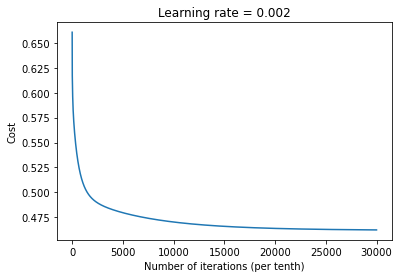

In [562]:
#y_hat, params, cost = gradient_descent(X_train, y_train)
y_hat, params, cost = gradient_descent(X_train, y_train, 300000, 0.002)

In [563]:
predictions = predict(X_test, params)

In [564]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [565]:
confusion_matrix(y_test, predictions)

array([[204,  20],
       [ 58, 111]])

In [566]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       224
           1       0.85      0.66      0.74       169

    accuracy                           0.80       393
   macro avg       0.81      0.78      0.79       393
weighted avg       0.81      0.80      0.80       393



In [567]:
accuracy_score(y_test, predictions)

0.8015267175572519

## Comparing my model with a simple model that predicts survival for females/death for males

In [568]:
base_rate_sex_model = titanic.Sex.map({'male':0, 'female':1})

In [483]:
print(classification_report(titanic.Survived, base_rate_sex_model))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       809
           1       0.73      0.68      0.70       500

    accuracy                           0.78      1309
   macro avg       0.77      0.76      0.76      1309
weighted avg       0.78      0.78      0.78      1309



In [484]:
accuracy_score(titanic.Survived, base_rate_sex_model)

0.7799847211611918